## LSTM Time Series

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
# Generate sample data
t = np.linspace(0, 10*np.pi, 50)
data = np.sin(t)

In [20]:
# Split data into input and output components
window_size = 10
X = []
y = []
for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
X = np.array(X)
y = np.array(y)

In [21]:
# Define LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
# Train LSTM model
model.fit(X.reshape((X.shape[0], X.shape[1], 1)), y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
40/40 - 1s - loss: 0.5019 - 1s/epoch - 34ms/step
Epoch 2/100
40/40 - 0s - loss: 0.4936 - 91ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.4851 - 83ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.4762 - 81ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 0.4678 - 80ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 0.4606 - 84ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 0.4486 - 73ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 0.4365 - 75ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 0.4226 - 101ms/epoch - 3ms/step
Epoch 10/100
40/40 - 0s - loss: 0.4048 - 103ms/epoch - 3ms/step
Epoch 11/100
40/40 - 0s - loss: 0.3842 - 97ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 0.3545 - 74ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s - loss: 0.3194 - 82ms/epoch - 2ms/step
Epoch 14/100
40/40 - 0s - loss: 0.2778 - 84ms/epoch - 2ms/step
Epoch 15/100
40/40 - 0s - loss: 0.2288 - 83ms/epoch - 2ms/step
Epoch 16/100
40/40 - 0s - loss: 0.1811 - 77ms/epoch - 2ms/step


In [23]:
# Generate predictions for new data
new_data = np.sin(np.linspace(10*np.pi, 12*np.pi, 20))
X_new = []
for i in range(len(new_data)-window_size):
    X_new.append(new_data[i:i+window_size])
X_new = np.array(X_new)
y_new = model.predict(X_new.reshape((X_new.shape[0], X_new.shape[1], 1)))


1/1 [==============================] - 0s 371ms/step


In [24]:
y_new

array([[-1.1346812 ],
       [-1.0626155 ],
       [-0.86186814],
       [-0.5497761 ],
       [-0.16259661],
       [ 0.16164617],
       [ 0.38440925],
       [ 0.5819652 ],
       [ 0.7193385 ],
       [ 0.80653393]], dtype=float32)

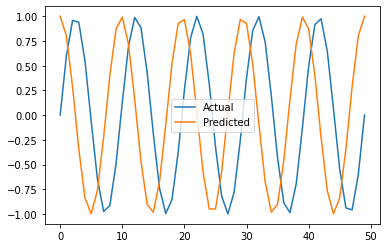

In [26]:
actual_data = np.sin(np.linspace(0, 10*np.pi, 50))
predicted_data = np.cos(np.linspace(0, 10*np.pi, 50))

# Plot the actual vs predicted data
import matplotlib.pyplot as plt
plt.plot(actual_data, label='Actual')
plt.plot(predicted_data, label='Predicted')
plt.legend()
plt.show()